# scRNAseq_keloid_sampleKF3_do_seurat

In [1]:
rm(list=ls())
gc()
library(Seurat)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,532330,28.5,1200052,64.1,641780,34.3
Vcells,991466,7.6,8388608,64.0,1754429,13.4


In [2]:
setwd("/Project_directory/cellRanger_wd/KF2/KF2/outs/filtered_feature_bc_matrix")

In [3]:
KF2.counts <- Read10X(data.dir = getwd())

In [4]:
dobultes=read.table("doubletsRes.txt",header=F,sep="\t")
str(dobultes)
dobultes[is.na(dobultes[,1]),1]=1
which(is.na(dobultes[,1])>0)
sum(dobultes[,1])
#261
dobultesIndex=dobultes[,1]>0
KF2.counts.noDoublet=KF2.counts[,!dobultesIndex]
dim(KF2.counts.noDoublet)

'data.frame':	9295 obs. of  1 variable:
 $ V1: num  0 0 0 0 0 0 0 0 0 0 ...


integer(0)

[1] 261

[1] 33538  9034

In [5]:
KF2 <- CreateSeuratObject(counts = KF2.counts.noDoublet,project = "KF2", min.cells = 3, min.features = 200)

In [6]:
KF2

An object of class Seurat 
21219 features across 8241 samples within 1 assay 
Active assay: RNA (21219 features)

In [7]:
KF2[["percent.mt"]] <- PercentageFeatureSet(KF2, pattern = "^MT-")

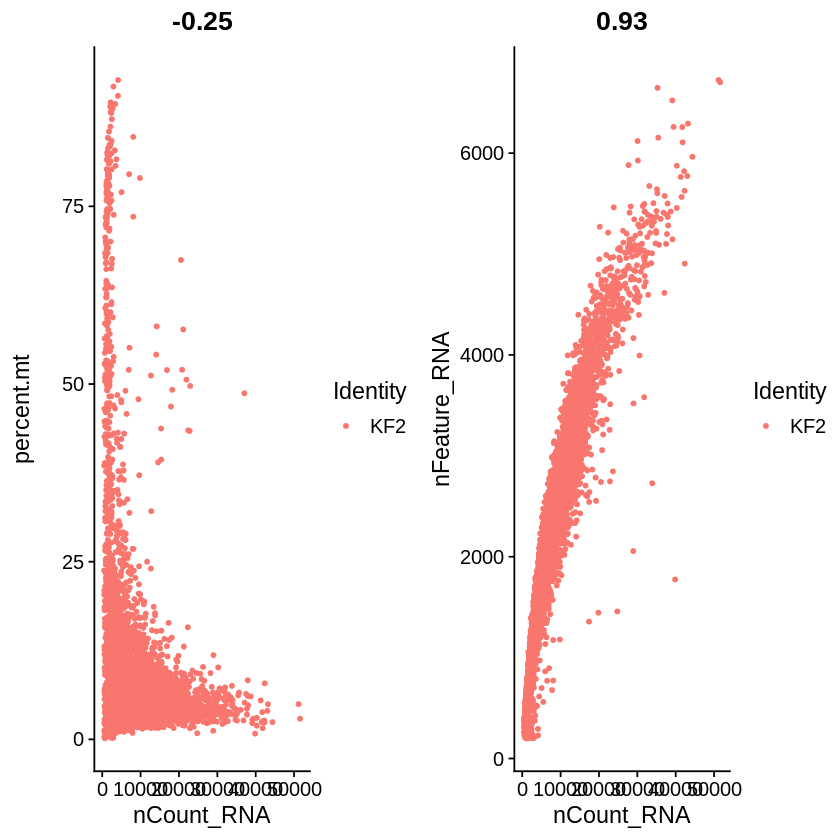

In [8]:
plot1 <- FeatureScatter(KF2, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(KF2, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

In [9]:
KF2 <- subset(KF2, subset = nFeature_RNA > 1000 & nFeature_RNA < 6000 & percent.mt < 15)

In [10]:
KF2

An object of class Seurat 
21219 features across 7159 samples within 1 assay 
Active assay: RNA (21219 features)

In [11]:
KF2 <- NormalizeData(KF2, normalization.method = "LogNormalize", scale.factor = 10000)
KF2 <- FindVariableFeatures(KF2, selection.method = "vst", nfeatures = 2000)
KF2 <- ScaleData(KF2, verbose = FALSE)
KF2 <- RunPCA(KF2, npcs = 30, verbose = FALSE)
KF2 <- RunUMAP(KF2, reduction = "pca", dims = 1:15)
KF2 <- FindNeighbors(KF2, dims = 1:15)
KF2 <- FindClusters(KF2, resolution = 0.5)
KF2 <- RunTSNE(object = KF2, dims.use = 1:15, do.fast = TRUE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”11:36:36 UMAP embedding parameters a = 0.9922 b = 1.112
11:36:36 Read 7159 rows and found 15 numeric columns
11:36:36 Using Annoy for neighbor search, n_neighbors = 30
11:36:36 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
11:36:38 Writing NN index file to temp file /tmp/RtmpM6D5IC/file6ff66624283bd
11:36:38 Searching Annoy index using 1 thread, search_k = 3000
11:36:41 Annoy recall = 100%
11:36:41 Commencing smooth kNN distance calibration using 1 thread
11:36:42 Initializing from normalized Laplacian + noise
11:36:43 Commencing optimizati

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7159
Number of edges: 232233

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9173
Number of communities: 14
Elapsed time: 0 seconds


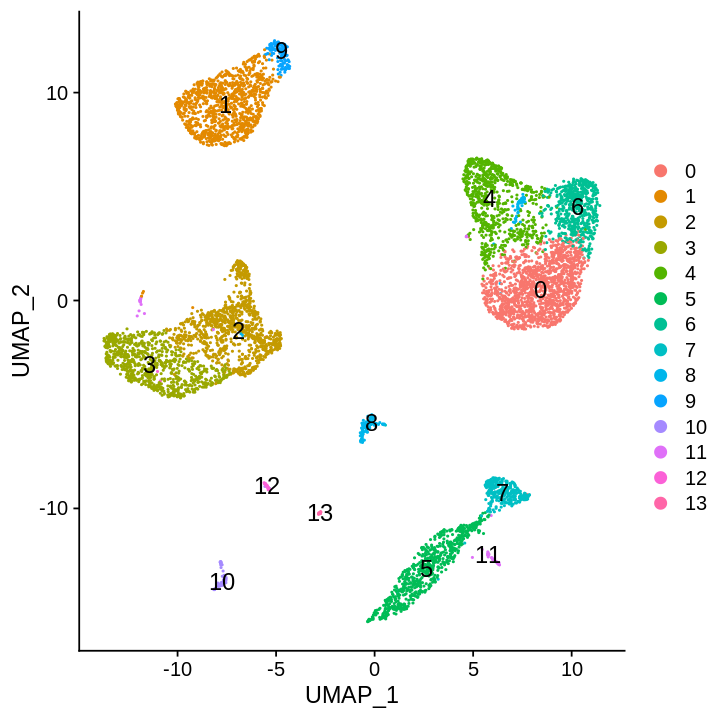

In [13]:
library(cowplot)
options(repr.plot.width=6,repr.plot.height=6)
DimPlot(KF2, reduction = "umap",label = T,label.size = 5)

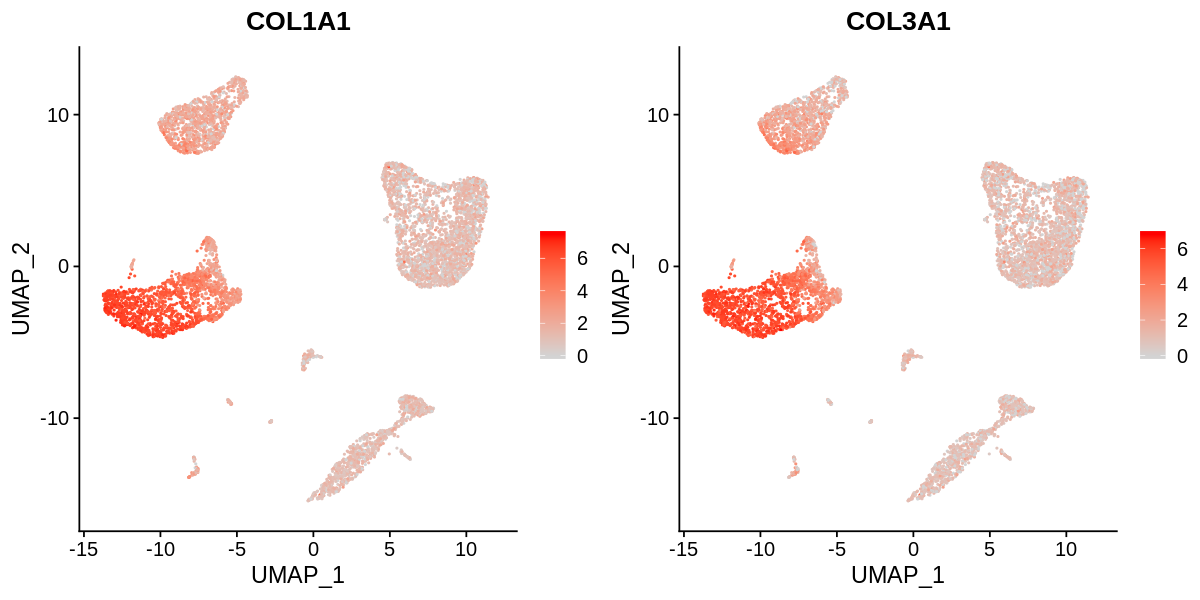

In [14]:
#fibroblast
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(KF2, features = c("COL1A1","COL3A1"),nc=2,cols=c("lightgrey", "red"))

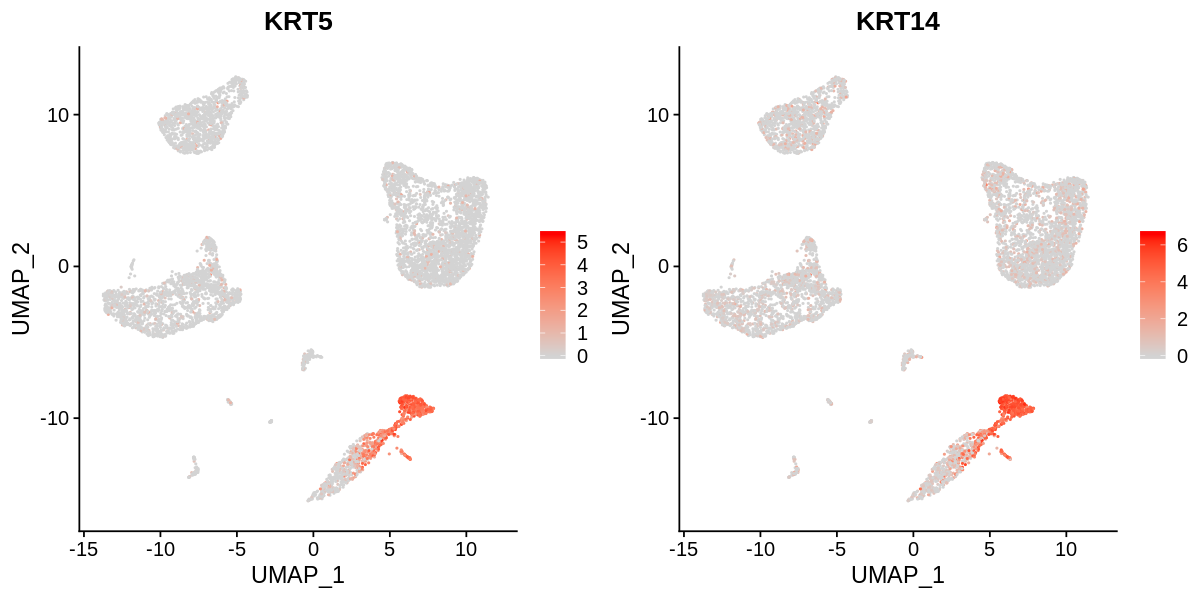

In [15]:
#basal cell (keratinocytes)
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(KF2, features = c("KRT5", "KRT14"),cols=c("lightgrey", "red"))

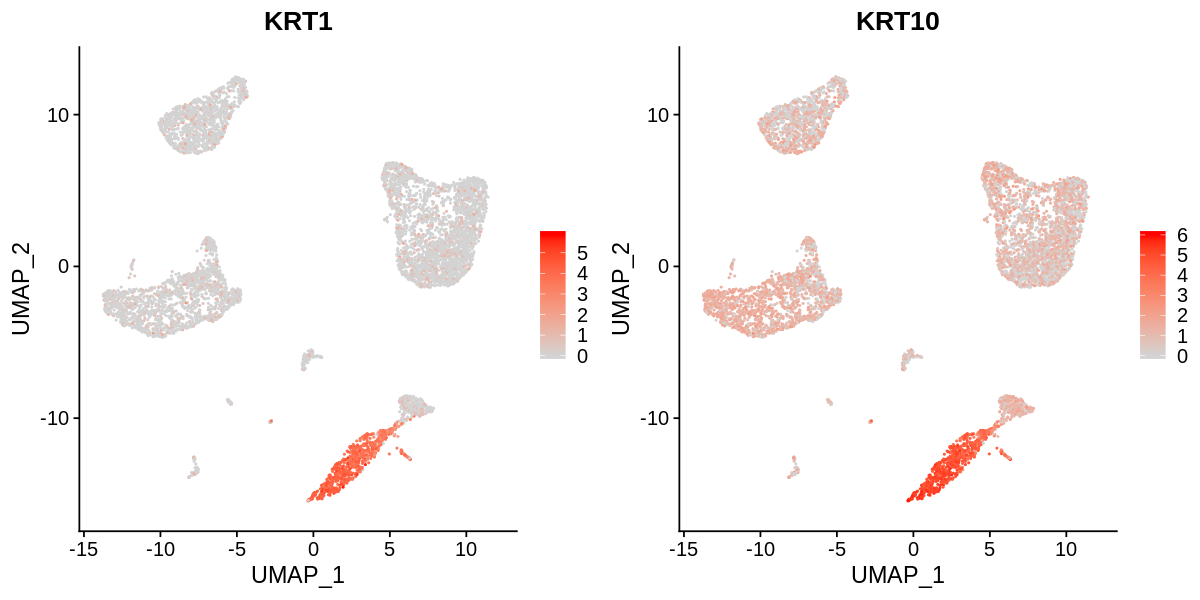

In [16]:
#keratinocytes spinous_cell
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(KF2, features = c("KRT1", "KRT10"),cols=c("lightgrey", "red"))

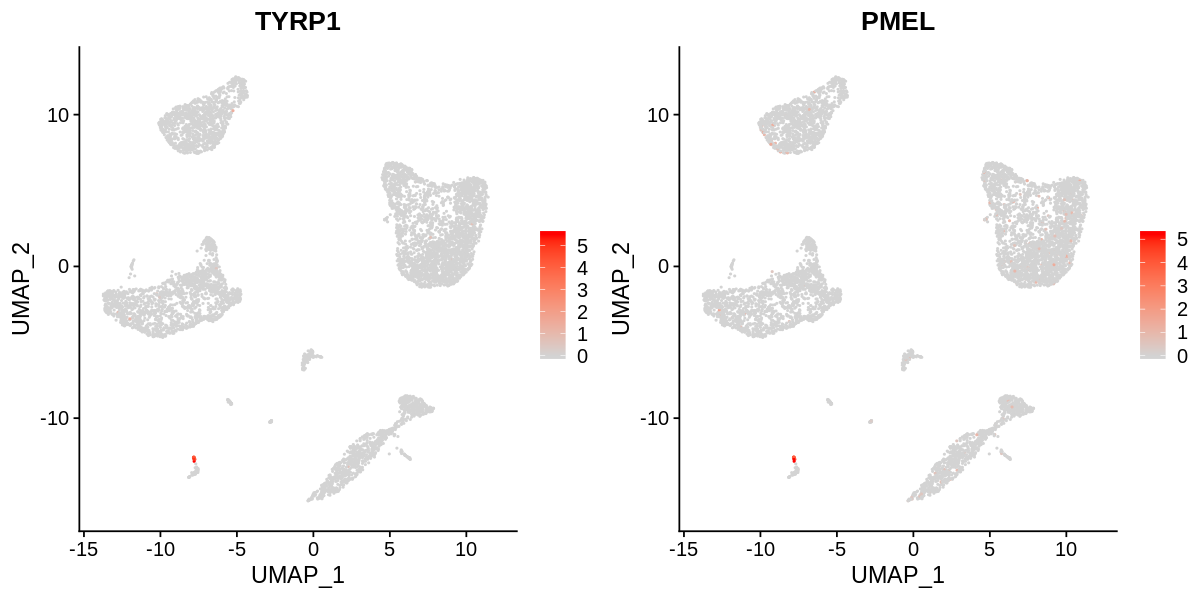

In [18]:
#Melanocytes
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(KF2, features = c("TYRP1", "PMEL"),cols=c("lightgrey", "red"))

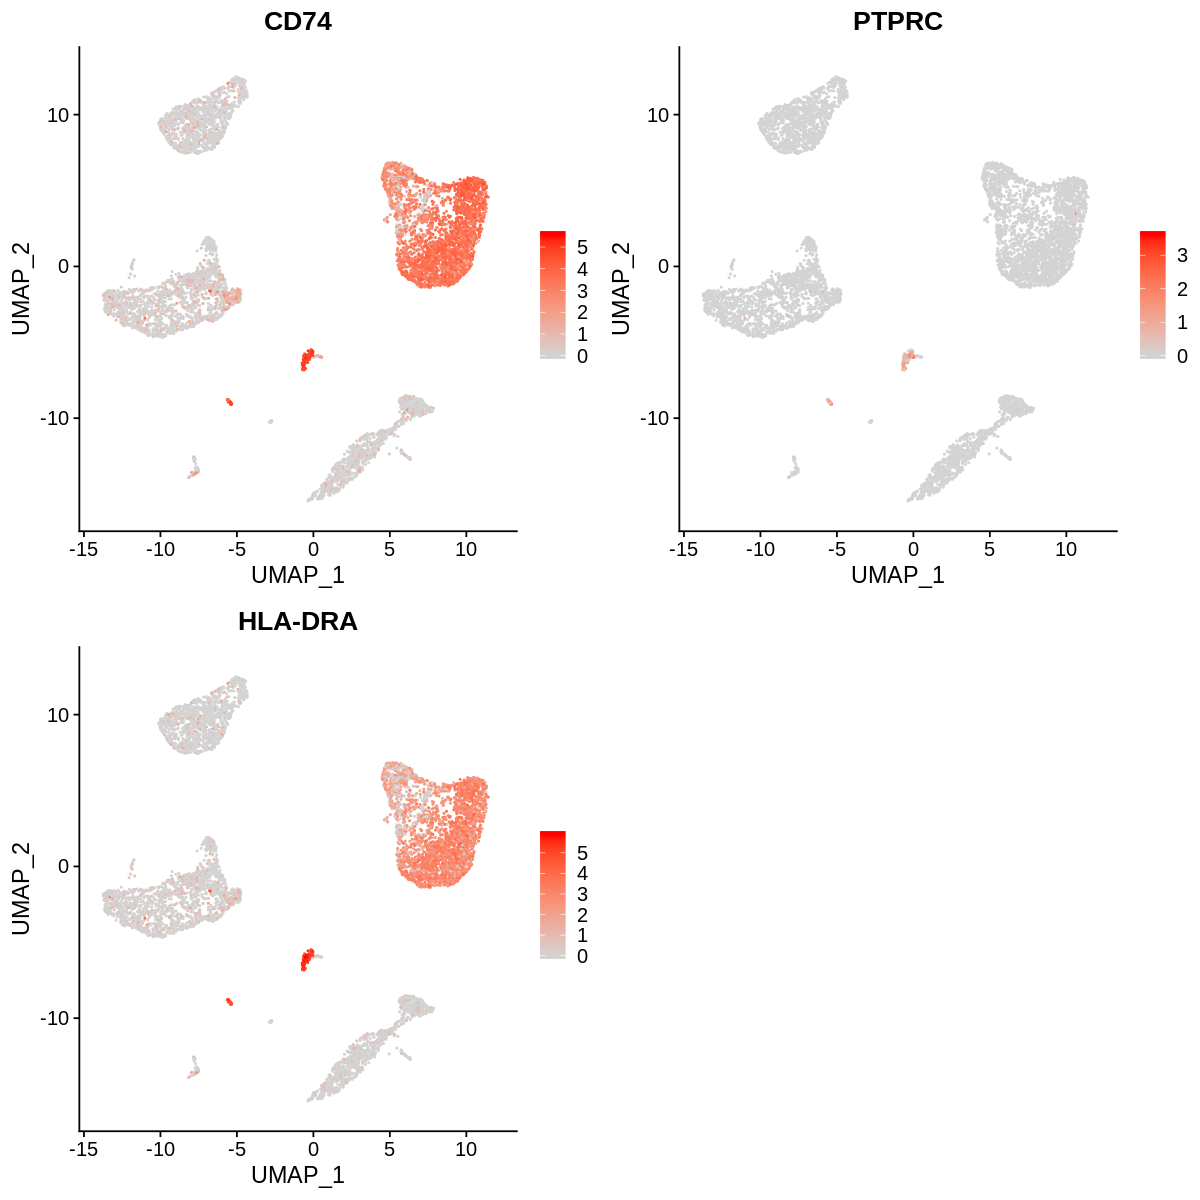

In [19]:
#immune
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(KF2, features = c("CD74", "PTPRC","HLA-DRA"),cols=c("lightgrey", "red"))

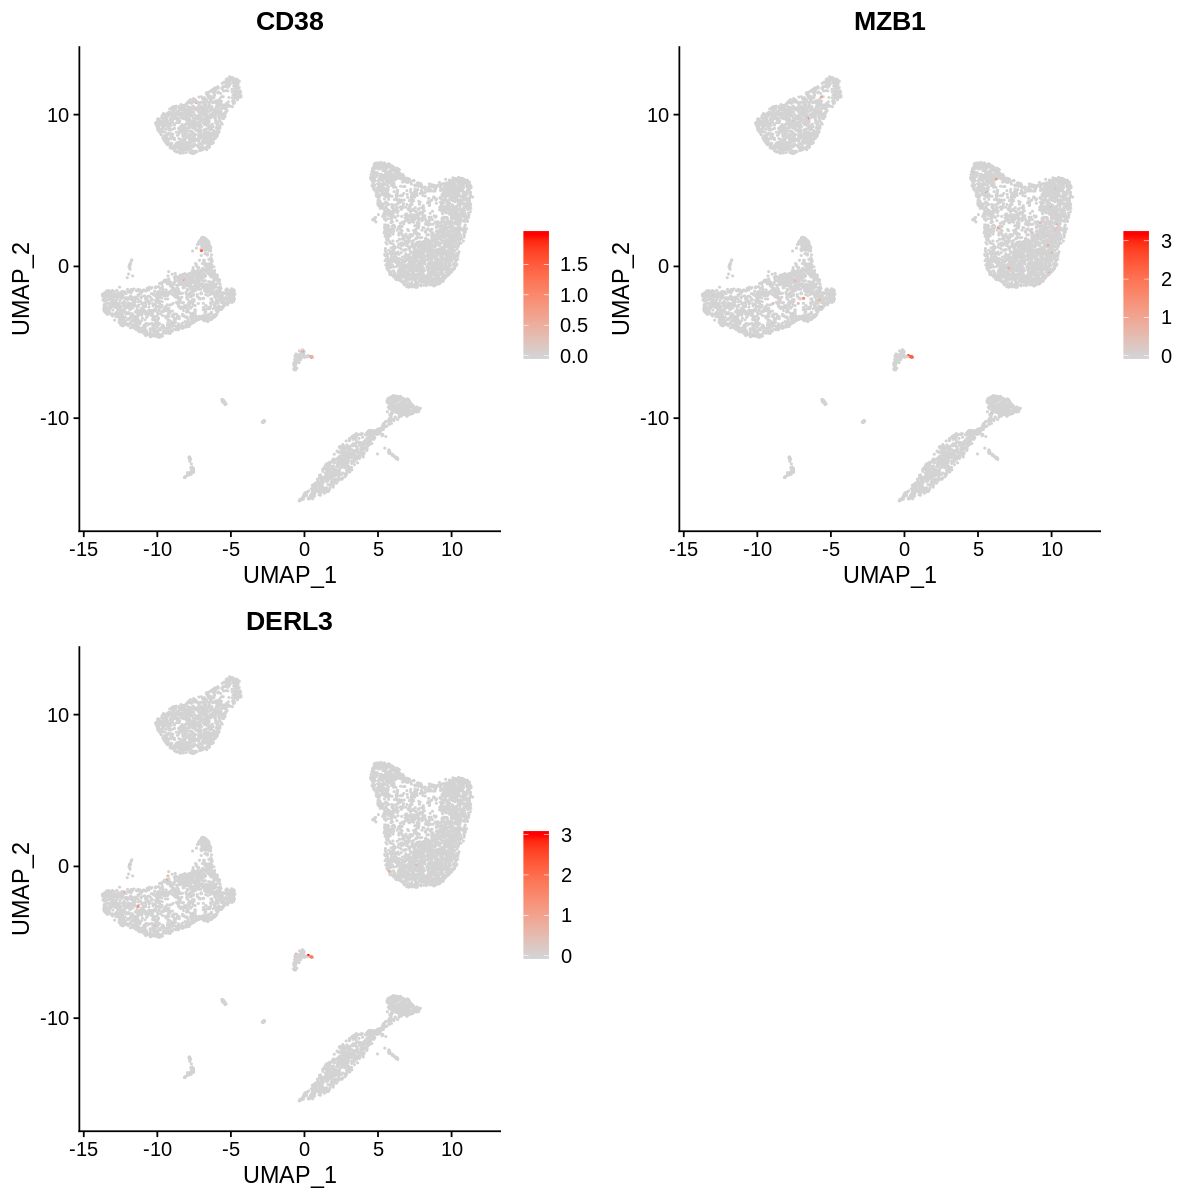

In [20]:
#immune B
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(KF2, features = c("CD38","MZB1","DERL3"),cols=c("lightgrey", "red"))

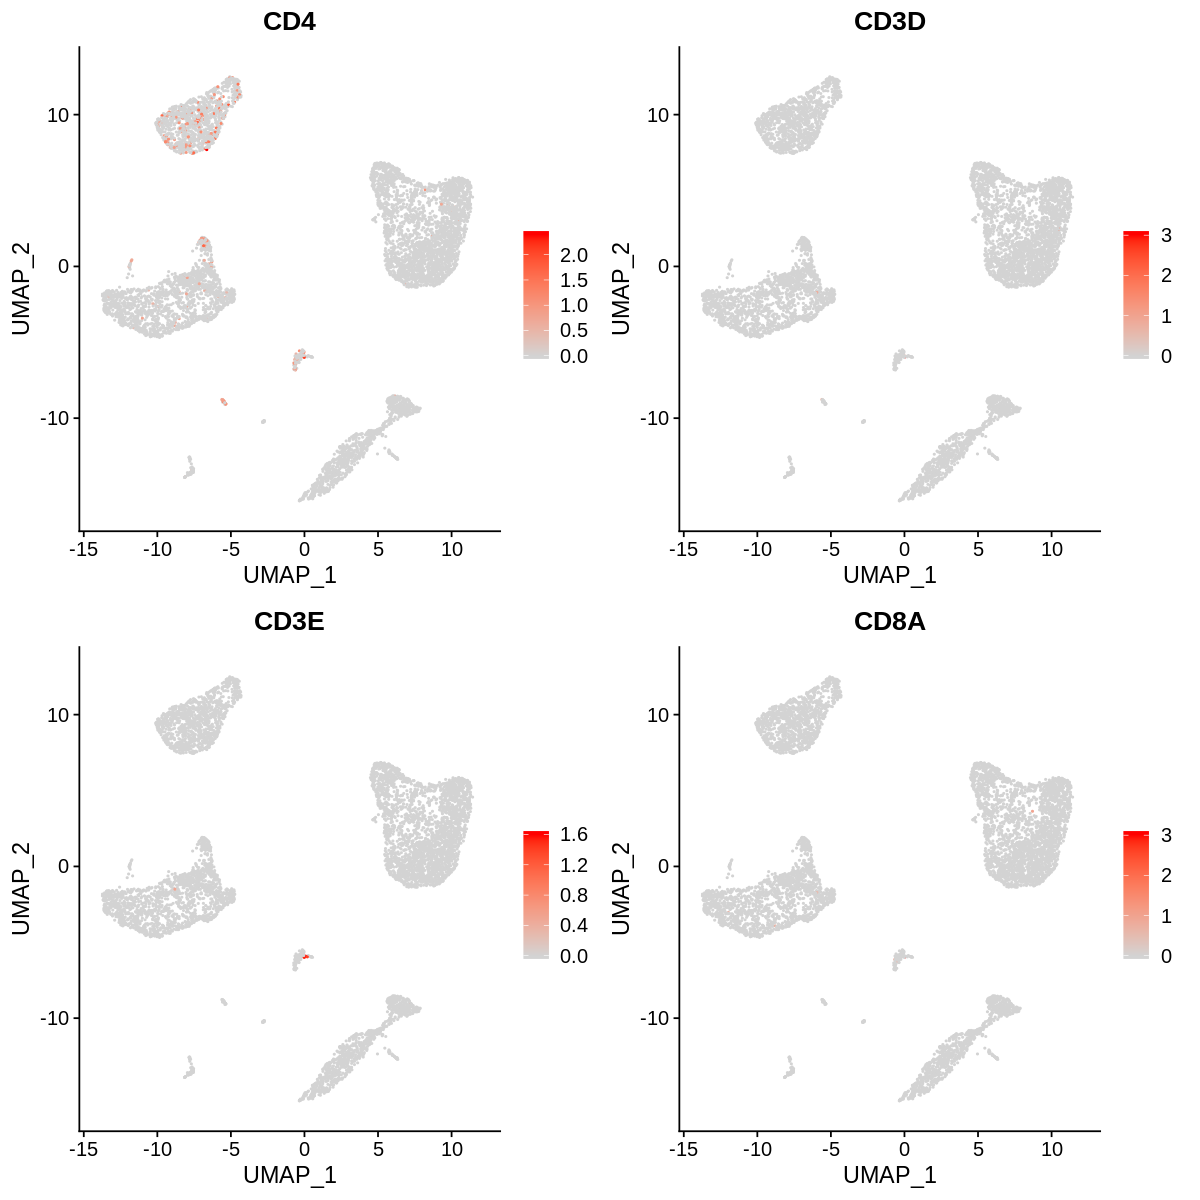

In [21]:
#immune T
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(KF2, features = c("CD4","CD3D","CD3E","CD8A"),cols=c("lightgrey", "red"))

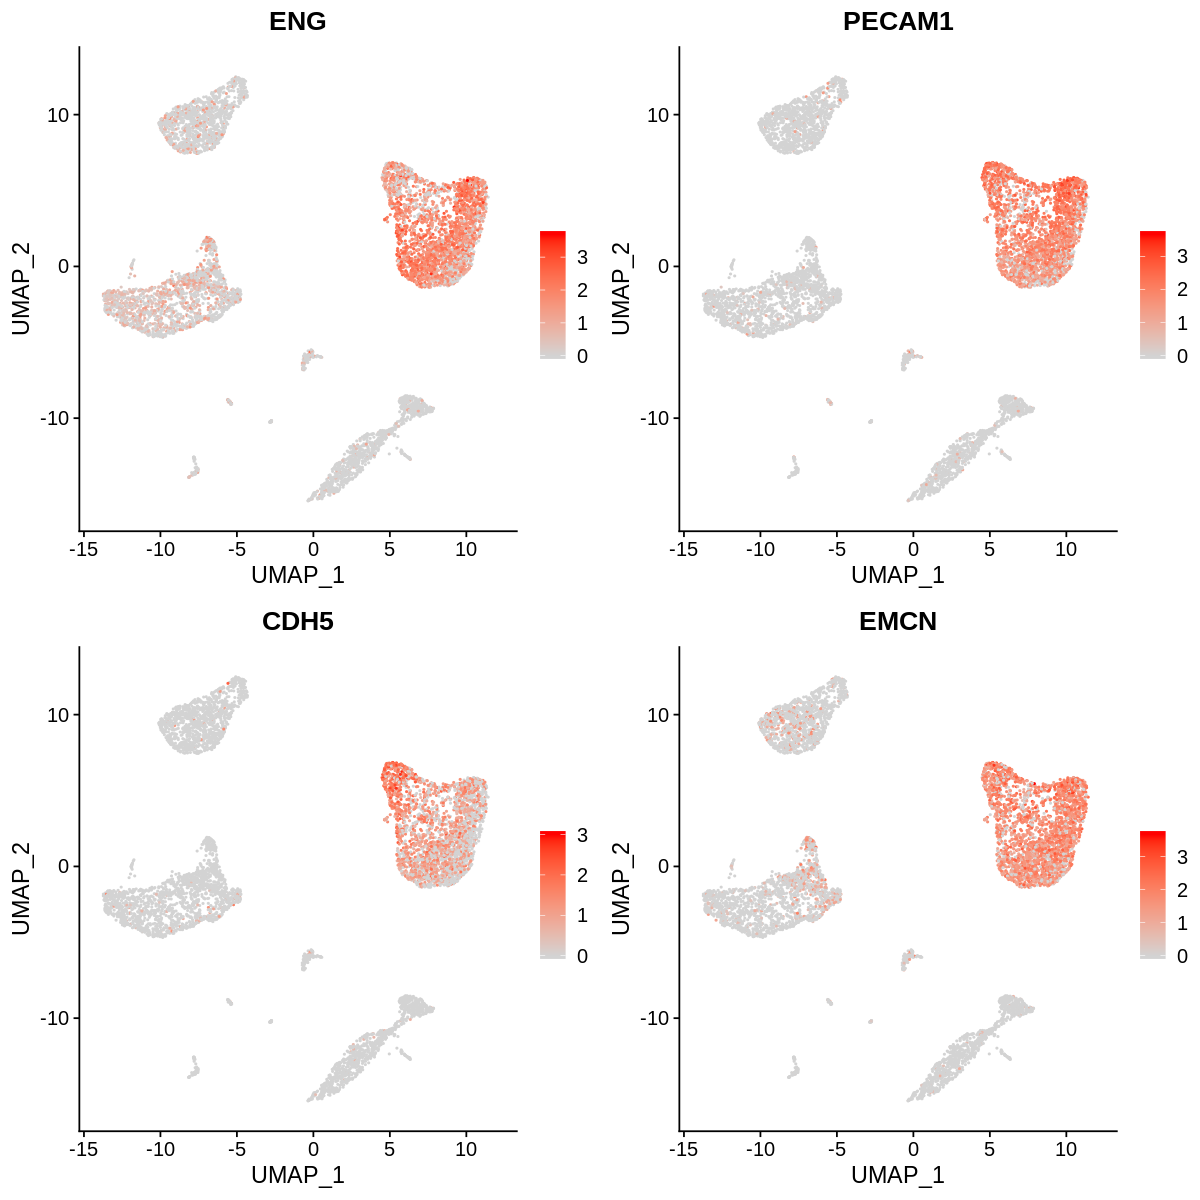

In [22]:
#endothelial cells
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(KF2, features = c("ENG","PECAM1","CDH5","EMCN"),cols=c("lightgrey", "red"))

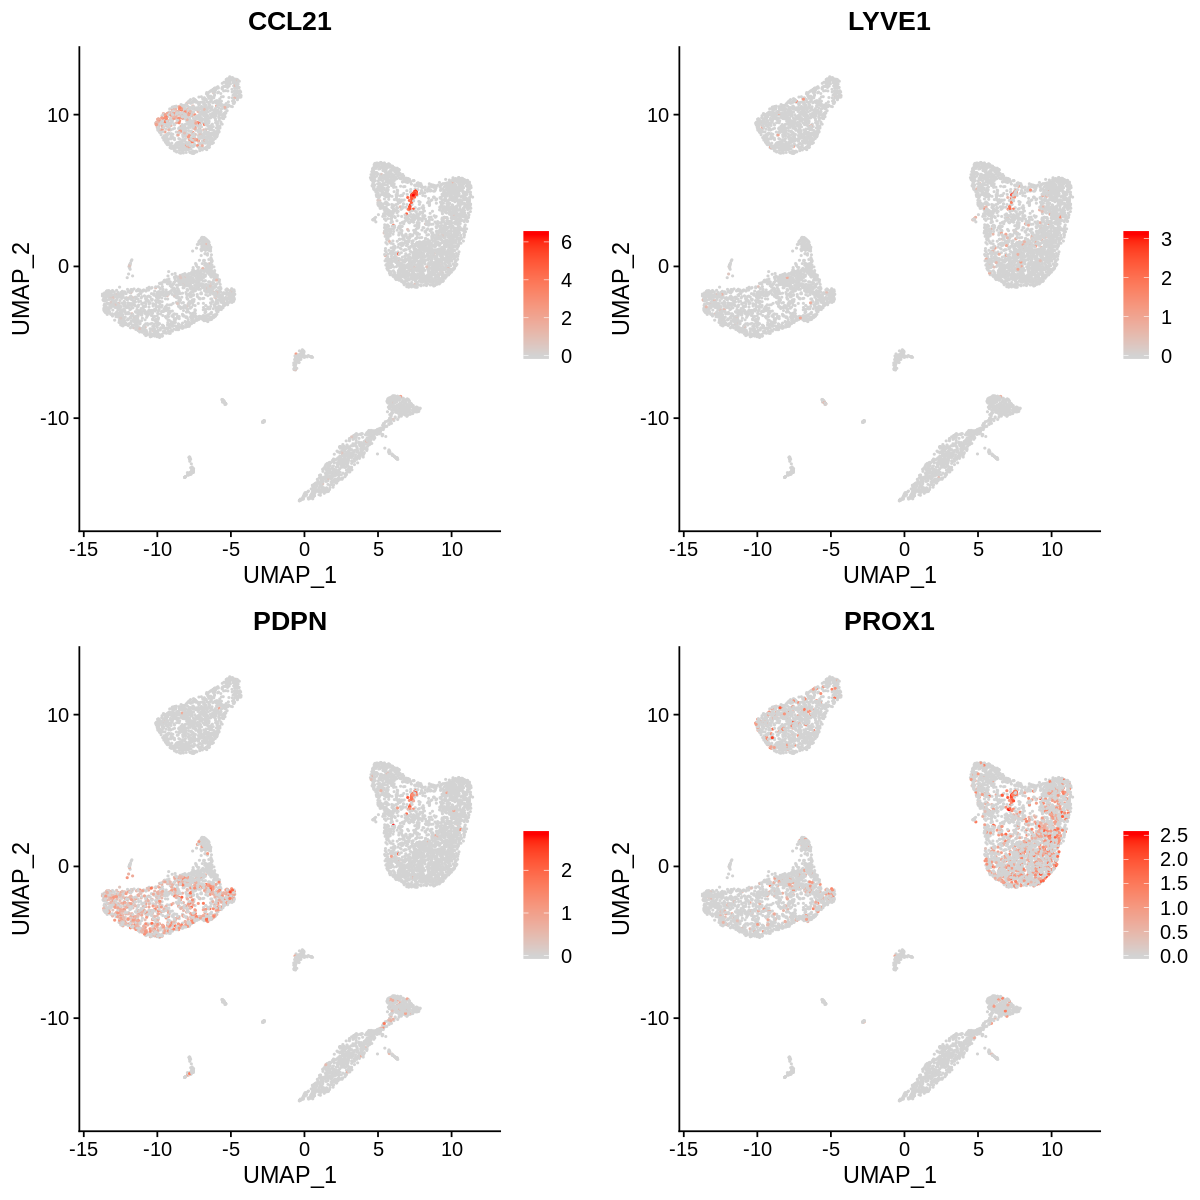

In [23]:
#lymphatic endothelial marker
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(KF2, features = c("CCL21","LYVE1","PDPN","PROX1"),cols=c("lightgrey", "red"))

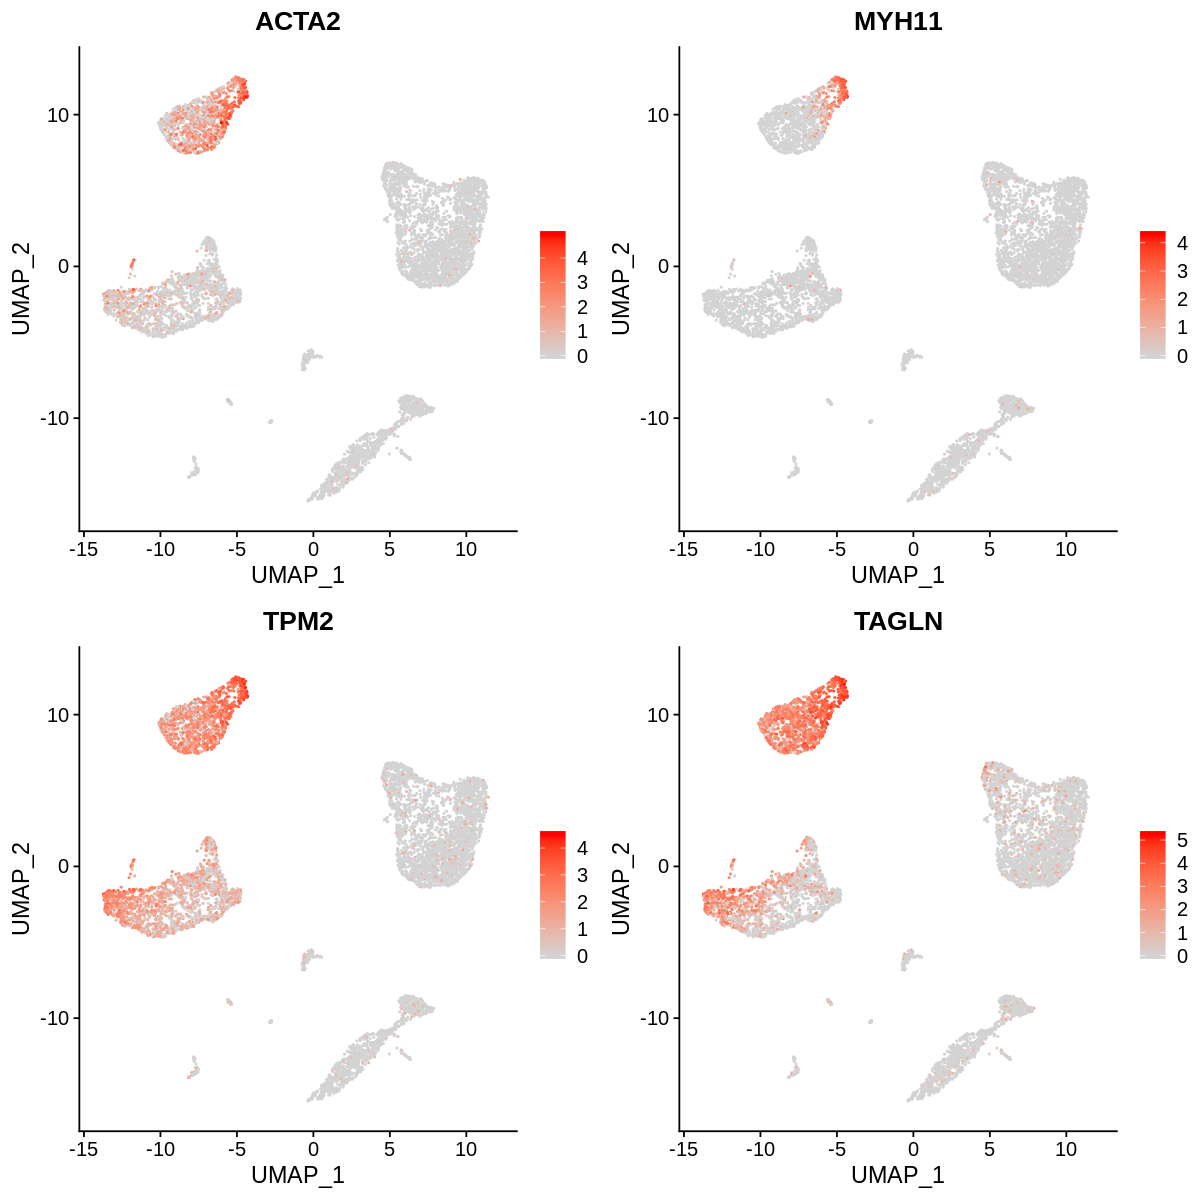

In [24]:
#muscle fiber marker
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(KF2, features = c("ACTA2","MYH11","TPM2","TAGLN"),cols=c("lightgrey", "red"))

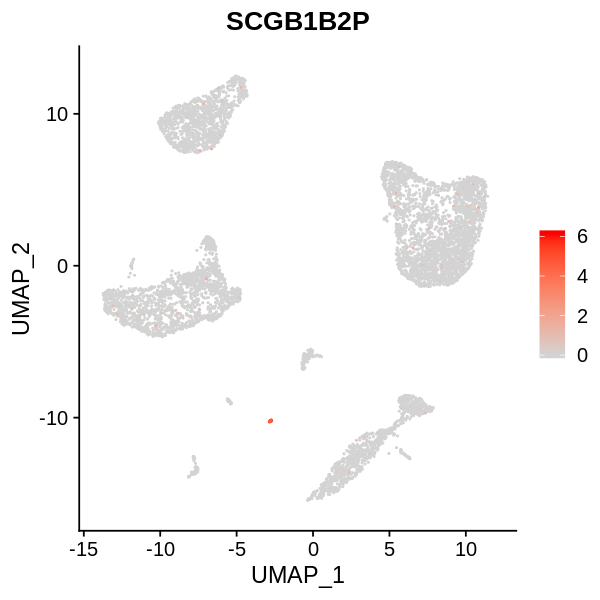

In [25]:
#secretory (glandular) cells
options(repr.plot.width=5,repr.plot.height=5)
FeaturePlot(KF2, features = c("SCGB1B2P"),cols=c("lightgrey", "red"))

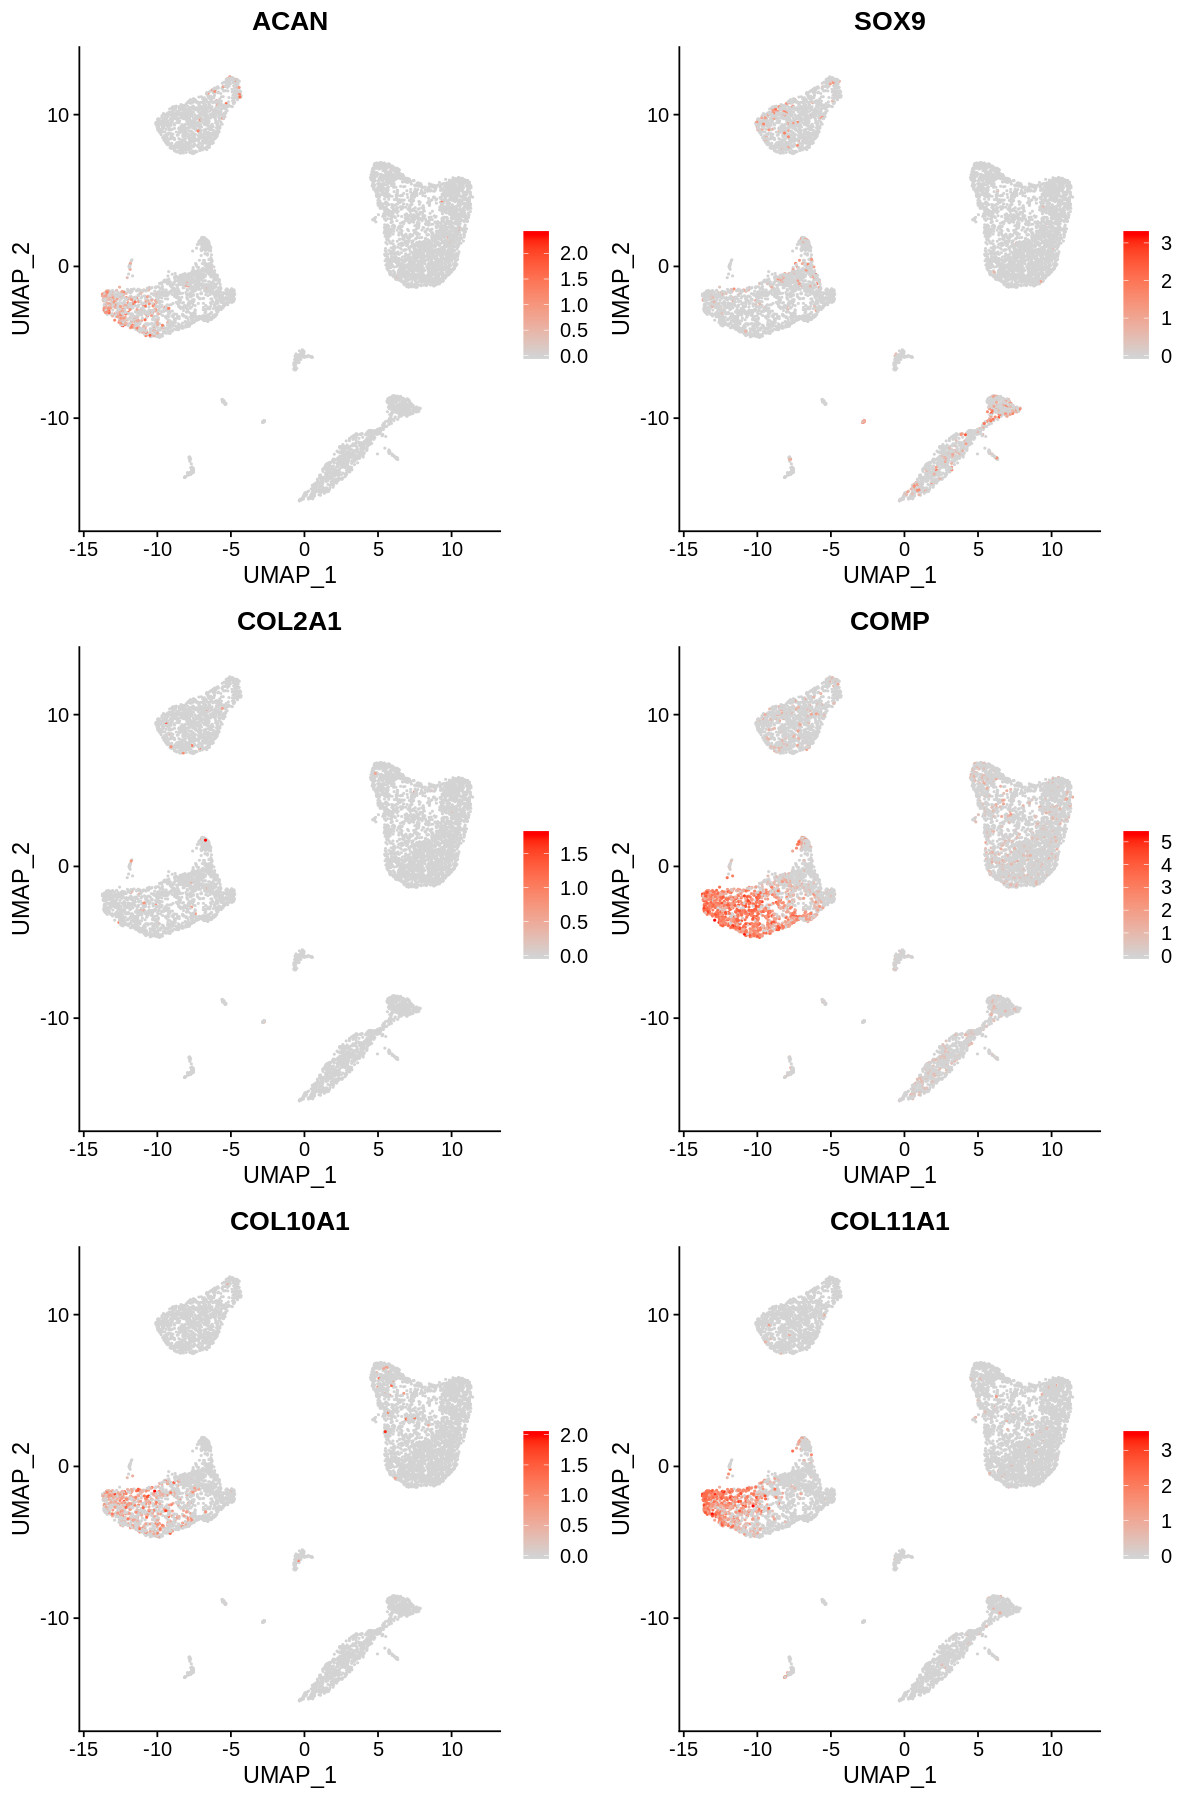

In [26]:
options(repr.plot.width=10,repr.plot.height=15)
FeaturePlot(KF2, features = c("ACAN","SOX9","COL2A1","COMP","COL10A1","COL11A1"),nc=2,cols=c("lightgrey", "red"))

In [28]:
dim(KF2)
KF2$dataset=rep("KF2",ncol(KF2))

[1] 21219  7159

In [29]:
table(Idents(KF2))


   0    1    2    3    4    5    6    7    8    9   10   11   12   13 
1402 1076 1015  831  734  695  584  311  179  123   90   58   38   23 

In [31]:
KF2.fib=subset(KF2,idents = c("2","3"))

In [32]:
KF2.fib

An object of class Seurat 
21219 features across 1846 samples within 1 assay 
Active assay: RNA (21219 features)
 3 dimensional reductions calculated: pca, umap, tsne

In [33]:
setwd("/mnt/dfc_data1/project/hobart/hospital/scRNAseq_keloid/allSample/KF2")

In [34]:
save(KF2,file="KF2.seurat.object.Rdata")

In [35]:
save(KF2.fib,file="KF2.fib.seurat.object.Rdata")

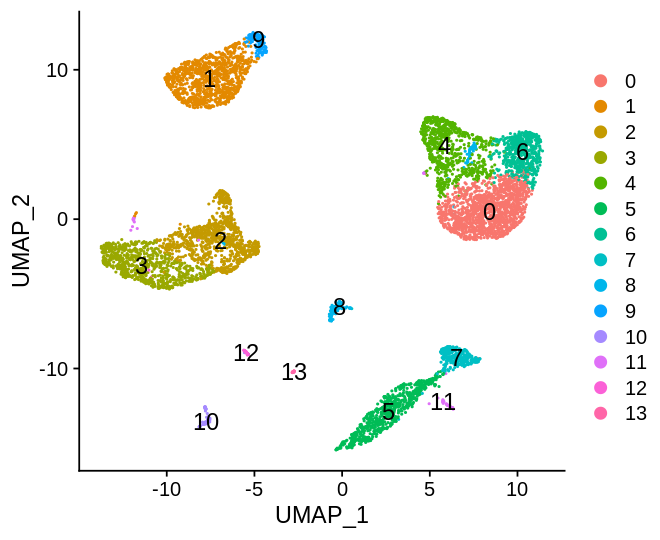

In [36]:
library(cowplot)
options(repr.plot.width=5.5,repr.plot.height=4.5)
DimPlot(KF2, reduction = "umap",label = T,label.size = 5)

In [39]:
new.cluster.id=c("Endothelial","muscle_fiber","Fibroblast","Fibroblast","Endothelial","Keratinocyte","Endothelial","Keratinocyte","Immune_cell","muscle_fiber","Melanocytes","Keratinocyte","Immune_cell","Unknown")
names(new.cluster.id)=levels(KF2)
KF2=RenameIdents(KF2,new.cluster.id)

In [40]:
table(Idents(KF2))


 Endothelial muscle_fiber   Fibroblast Keratinocyte  Immune_cell  Melanocytes 
        2720         1199         1846         1064          217           90 
     Unknown 
          23 

In [41]:
write.csv(table(Idents(KF2)),"KF2.cluster_cellType_Statis.csv")

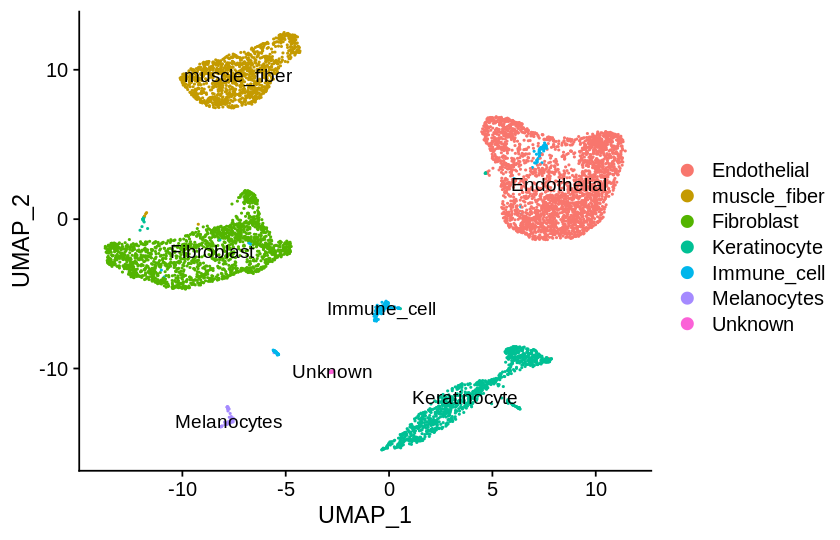

In [42]:
library(cowplot)
options(repr.plot.width=7,repr.plot.height=4.5)
DimPlot(KF2, reduction = "umap",label = T,label.size = 4)